## List comprehension

Just think of it as a one-line way to create a list from another list.

Here it is adding a one to each number of `my_list` and storing the results in `compre_list`

In [1]:
my_list = [1,2,3,4,5]

compre_list = [i**2+10 for i in my_list]
print(my_list)
print(compre_list)

[1, 2, 3, 4, 5]
[11, 14, 19, 26, 35]


In [2]:
my_list = ['Notre Dame', 'Michigan', 'Notre Dame','Michigan','Michigan']

count = 0
for i in my_list:
    if i == 'Notre Dame':
        count += 1
        
print("there are {} items that are Notre Dame".format(count))
    

there are 2 items that are Notre Dame


In [3]:
my_list = ['Notre Dame', 'Michigan', 'Notre Dame','Michigan','Michigan']

mendoza_indicator = [1 if x=='Notre Dame' else 0 for x in my_list]

print( sum(mendoza_indicator))

print(my_list)
print(mendoza_indicator)
print("Notre Dame is listed {} number of times".format(sum(mendoza_indicator)))

2
['Notre Dame', 'Michigan', 'Notre Dame', 'Michigan', 'Michigan']
[1, 0, 1, 0, 0]
Notre Dame is listed 2 number of times


## Fixed Type Arrays in Python (Available since Python 3.3)

In [4]:
# arrays are part of python core but not automatically available
import array

In [5]:
basic_list = list(range(10))
print(basic_list)
basic_array = array.array('i',basic_list)
basic_array

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
# force list items into floats

basic_list = list(range(10))
basic_array_of_floats = array.array('f',basic_list)
basic_array_of_floats

array('f', [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0])

In [7]:
basic_array_of_floats.append(42)
print(basic_array_of_floats)
basic_array_of_floats.append('wat?')

array('f', [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 42.0])


TypeError: must be real number, not str

# NumPy - Numerical Python 

## Importing numpy array

In [8]:
import numpy as np
np.__version__

'1.17.2'

Note: Some of the examples and content are from our text book PDSH Ch. 2

## Fundamentals of NumPy Arrays


### Creating NumPy array from a list

In [9]:
list_of_ints = [0, 1, 2, 3, 4, 5]
np_ints = np.array(list_of_ints)

In [11]:
np_ints

array([0, 1, 2, 3, 4, 5])

### Creating NumPy array from scratch

In [12]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
np.full(10, 3.1415)

array([3.1415, 3.1415, 3.1415, 3.1415, 3.1415, 3.1415, 3.1415, 3.1415,
       3.1415, 3.1415])

In [14]:
np.arange(5,25, 5)

array([ 5, 10, 15, 20])

In [15]:
np.arange?

## Accessing NumPy Array

In the last two classes we have used Python's built-in `list` and now we are using array type provided by the NumPy package. 

<div class="alert alert-block alert-info">
The actual name of the NumPy array type is `ndarray`. So, when we refer to a Numpy Array or an `ndarray` we are talking about the same thing.</div> 

Another similiarity between the two types is how you can retrieve the data elements they contain.

For either type, you can access an element by simple adding brackets to the end of the object name with the index of the element you want inside the bracket.

<div class="alert alert-block alert-warning">
Just remember the first element is `0`, not `1`. Forget this and you'll have all sorts of problems.
</div> 


In [16]:
numeric_array = np.array(range(1, 11))
numeric_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [17]:
print(numeric_array[5])
print(numeric_array[0])
print(numeric_array[3:8])
print(numeric_array[-1])

6
1
[4 5 6 7 8]
10


In [18]:
print(numeric_array[10])

IndexError: index 10 is out of bounds for axis 0 with size 10

## Array Slicing: Accessing Subarrays <a name="slicing"></a>

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the *slice* notation. 

The NumPy slicing syntax follows that of the standard Python `list`; to access a slice of an array `x`, use the `start:stop:step` notation inside of brackets:
``` python
x[start:stop:step]
```

If any of these are unspecified, they default to the values: 
* `start=0`
* `stop=`*`size of dimension`*
* `step=1`.

#### Sample Slice Notations
Here are some sample slice notations and their meanings.
* `1:5:1`: Return elements 2 through 5 in normal order. (Remember that with 0-based indexing, 1 is the second element.
* `:8:1`: Return elements 0 through 8 in normal order. Since the `start` parameter is left out, it assumes it's default value.
* `::-1`: Return all elements (first two parameters are default values) in reserve order.

Let's try slice notations

In [19]:
numeric_array = np.array(range(1, 11))
numeric_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [20]:
# appending more elements to a numpy array
# numeric_array.append(9) ## does not work
np.append(numeric_array, [11,12,13])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [21]:
# Return everything up to the 4th element
numeric_array[:4]

array([1, 2, 3, 4])

In [22]:
# Return the 4th up to 8th skipping every other
numeric_array[3:8:2]

array([4, 6, 8])

In [23]:
# Go in reverse
numeric_array[::-1]

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

## `ndarray` Slices are Segments, not Copies <a name="subcopy"></a>

This is the last topic for this tutorial.

When we use slice notation on an `ndarray`, it returns a segment of the original - as opposed to a copy. This means that if you change the elements of a slice, you will also change them in the original array.

<div class="alert alert-block alert-danger">
It is very important for experienced Python programmers to note since this is the opposite of what happens when you slice a `list` object.
</div> 

While this may seem like a bad thing at first, particular for those of us who are used to slicing `list` objects, this can actually help us when we want to process little chuncks of data at a time.

Let's demonstrate:

In [24]:
# assignment by reference like lists

na_1 = np.random.randint(10, size=10)  
na_2 = na_1
na_2[0] = "42"
na_1

array([42,  9,  1,  3,  1,  5,  2,  8,  8,  1])

In [25]:
numeric_array = np.random.randint(100, size=10)  
numeric_array

array([72, 12, 46, 37, 50, 17, 19, 95, 13,  4])

In [26]:
part_of_it = numeric_array[3:6]
part_of_it

array([37, 50, 17])

In [27]:
part_of_it[0:2] = [1000, 2000]

# And re-output `numeric_array`
numeric_array

array([  72,   12,   46, 1000, 2000,   17,   19,   95,   13,    4])

### Numpy Arrays are Homogeneous
You can only have one data type in the array but it works a little different than python arrays

In [28]:
random_list = [1, 2.2, "three"]
random_nparray = np.array(random_list)
random_nparray

array(['1', '2.2', 'three'], dtype='<U32')

In [29]:
floaty_array = np.array([1.1,2.2,3.3])
floaty_array

array([1.1, 2.2, 3.3])

In [30]:
wordy_array = np.array(['one', 'two', 'three'])
np.append(floaty_array, wordy_array)

array(['1.1', '2.2', '3.3', 'one', 'two', 'three'], dtype='<U32')

### Forcing an Array's Data Type
You also have the option of forcing all NumPy array elements to have a specific data type.  Here I'll take a `list` of `float` objects and coerce them into `int` objects by specifying the **`dtype`** parameter on the `np.array` function.

In [32]:
list_of_floats = [11.2, 57.6, 95.1]
forced_int_array = np.array(list_of_floats, dtype=int)
forced_int_array


array([11, 57, 95])

In [33]:
# but it won't remember...

np.append(forced_int_array, wordy_array)

array(['11', '57', '95', 'one', 'two', 'three'], dtype='<U21')

<div class="alert alert-block alert-info">
<p>The <code>dtype</code> parameter can take many different values in additional these standard Python types: <code>int, float, bool, complex</code>.</p>

<p>For a complete list, you can visit <a href="https://docs.scipy.org/doc/numpy/user/basics.types.html" target="_blank">NumPy website.</a>
</div>

### Arrays can be Multi-Dimensional
NumPy arrays can be multi-dimensional. We'll start with a two dimensional array, which can be thought of a grid with x and y coordinates.

In [34]:
# Don't focus on how this is being created. Just focus on the output.
two_dimensional_array = np.array([range(i, i + 3) for i in [2, 4, 6]])
two_dimensional_array

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

#### Accessing Multi-Dimensional Arrays

In [35]:
# Get the 0th indexed row (only specify an "x" coordinate)
print(two_dimensional_array[0])

# Get the 3rd row (index of 2)
print(two_dimensional_array[2])

# Get 3rd indexed row ([2]) and then get the 2nd indexed column ([1]) in that row. 
print(two_dimensional_array[2][1])


[2 3 4]
[6 7 8]
7


In [36]:
print(two_dimensional_array,"\n")

print('\n Go through second ([1]) and third ([2]) array and collect the first element in each')
print("This will return a new array")
print(two_dimensional_array[1:3,0])

print('\nGo through second ([1]) and third ([2]) array and return the first of those arrays')
print("This will return an existing array in the larger 2D array")
print(two_dimensional_array[1:3][0])

[[2 3 4]
 [4 5 6]
 [6 7 8]] 


 Go through second ([1]) and third ([2]) array and collect the first element in each
This will return a new array
[4 6]

Go through second ([1]) and third ([2]) array and return the first of those arrays
This will return an existing array in the larger 2D array
[4 5 6]


In [37]:
two_dimensional_array

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [38]:
# Same as above
two_dimensional_array[:3,1]

array([3, 5, 7])

In [39]:
# grab a slice of the array (' : ' returns the entire thing) 
# then slice again return a sub array of i element
# this returns a 2D array
two_dimensional_array[:,:2]

array([[2, 3],
       [4, 5],
       [6, 7]])

In [40]:
two_dimensional_array

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [41]:
# This gets translated in the Python as two_dimensional_array[0:3, 1]
two_dimensional_array[:,1]

array([3, 5, 7])

In [42]:
# Same as above but first element
two_dimensional_array[:,0]

array([2, 4, 6])

In [43]:
# grab a slice of the array (again the whole thing) then return a slice of the first two elements
two_dimensional_array[:,:1]

array([[2],
       [4],
       [6]])

In [44]:
# grab a slice of the array (up to the 3rd) then return a slice of the first two elements
two_dimensional_array[0:2,:2]

array([[2, 3],
       [4, 5]])

**NOTE**: See the distiction of accessing `two_dimensional_array[:,0]` which gets you the 0th indexed column as an array (single dimensional), whereas `two_dimensional_array[:,:1]` gets you the same 0th indexed column but as a two dimensional array. 

## NumPy Array Attributes
Like all objects, NumPy Arrays have a set of attributes. Let's take moment to discuss some that you may find particularly helpful:

1. `ndim`
1. `shape`
1. `size`
1. `dtype`

To get started, let's create 3 arrays.

In [45]:
x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

print("One Dimensional Array",   x1, sep='\n')
print("Two Dimensional Array",   x2, sep='\n')
print("Three Dimensional Array", x3, sep='\n')

One Dimensional Array
[6 6 7 9 5 2]
Two Dimensional Array
[[7 0 6 0]
 [1 7 6 9]
 [2 9 5 5]]
Three Dimensional Array
[[[3 8 1 9 9]
  [0 2 3 7 0]
  [5 7 4 8 6]
  [2 6 5 1 7]]

 [[4 2 2 7 9]
  [1 3 0 3 4]
  [0 7 9 5 4]
  [8 1 9 2 8]]

 [[0 3 9 8 4]
  [5 0 0 2 6]
  [1 1 4 9 7]
  [5 8 8 1 6]]]


### `ndim` Attribute
Returns the number of dimensions a given array has.

In [46]:
print(x1.ndim, x2.ndim, x3.ndim)

1 2 3


### `shape` Attribute
Returns the number of elements a given dimension has. For our `x2` array we'd get this output:

```python
x2.shape
(3, 4)
```

If you look above, you'll see that the full represenation of our `x2` array was like this:

```
[[6 7 9 1]
 [3 4 1 2]
 [6 7 0 7]]
```

The `(3, 4)` returned by `x2.shape` is referring to the fact that our array had three "rows" and four "columns" in each row.

In [47]:
print(x2)
print(x2.shape)

[[7 0 6 0]
 [1 7 6 9]
 [2 9 5 5]]
(3, 4)


In [ ]:
print(x3.shape)

In [ ]:
row,col = x2.shape
print(row)
print(col)

In [ ]:
# you must have matching number of values
row,col = x3.shape
print(row)
print(col)

### `size` Attribute
Returns the total number of elements across all dimensions of an array.

So, for our one-dimensional array `size` will be 6.  
For our 2 dimensional array had dimensions of 3 & 4 elements, so `size` will be 12.  
Our 3 dimensional array had dimensions of 3, 4, and 5. Therefore it will have a total size of 60 elements.

In [48]:
print("x1 size:", x1.size)
print("x2 size:", x2.size)
print("x3 size:", x3.size)

x1 size: 6
x2 size: 12
x3 size: 60


### `dtype` Attribute
Previously, we passed a `dtype` argument to the `np.array` constructor function to coerce the data type of the array's elements.

It comes about again here, but this time as an attribute of all NumPy array's. Unsurprisingly, it tells you the data type of the objects held inside the array.

In [49]:
float_array = np.array([1, 2, 3.1])
float_array.dtype

dtype('float64')

In [50]:
float_array = np.array([1, 2, 3])
float_array.dtype

dtype('int64')

In [51]:
string_array = np.array("Python is something else".split())
print(string_array)
string_array.dtype

['Python' 'is' 'something' 'else']


dtype('<U9')

### `itemsize` and `nbytes` Attributes
Other attributes include ``itemsize``, which lists the size (in bytes) of each array element, and ``nbytes``, which lists the total size (in bytes) of the array:

In [52]:
print("array size:", x3.size)
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")
print("calulated nbytes: ",x3.itemsize * x3.size)

array size: 60
itemsize: 8 bytes
nbytes: 480 bytes
calulated nbytes:  480


In general, we expect that ``nbytes`` is equal to ``itemsize`` times ``size``.

# NumPy Array Sorting, Merging, Reshaping and Splitting

## ND Football roster data

The Notre Dame football athletes information is a publicly accessible data that provides information about the athletes, their jersey number, name, position, height, weight, class and hometown. 

To get start, we will work with an array of football player weights from your tutorial dataset.

In [53]:
# We will understand each of the packages in the course as we move along, for now let us import them
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

### Make sure this Jupyter file (and all others)  and the 'data' folder are in the same folder. Also make sure the 'data' folder contains the data file 'nd-football-2017-roster.csv' downloaded from Sakai (or Google drive) 

In [54]:
# At this point you don't have to know the details of following data loading. 
# However, understand that it is loading the weights of all the athletes
nd_player_weights = np.array(pd.read_csv('./data/nd-football-2018-roster.csv')['Weight'])

In [55]:
nd_player_weights

array([215, 225, 204, 205, 240, 197, 190, 220, 222, 213, 218, 211, 265,
       190, 180, 202, 203, 191, 170, 212, 200, 178, 220, 224, 178, 215,
       202, 185, 193, 198, 246, 196, 181, 205, 225, 235, 228, 194, 170,
       204, 205, 205, 193, 186, 181, 223, 185, 215, 190, 226, 220, 211,
       222, 237, 205, 170, 197, 213, 212, 200, 195, 228, 295, 241, 181,
       200, 190, 245, 227, 210, 217, 245, 195, 240, 245, 240, 225, 265,
       306, 330, 235, 295, 290, 303, 295, 284, 270, 280, 284, 230, 306,
       228, 319, 303, 315, 295, 308, 314, 313, 316, 212, 228, 246, 227,
       258, 250, 247, 185, 219, 260, 255, 330, 285, 300, 306, 305])

## Activity:

Compute the following details

* Number of players in the dataset
* The average weight of the players
* The weight of the lightest player
* The weight of the heaviest player

In [62]:
# number of players using basic python and/or numpy's .size
print(nd_player_weights.size)
print(len(nd_player_weights))

116
116


In [63]:
# averge weight with basic python and/or numpy's and/or .size
sum(nd_player_weights) / len(nd_player_weights)

232.43103448275863

In [64]:
# lighest weight using python
min(nd_player_weights)

170

In [65]:
# heaviest weight using python
nd_player_weights

330

## Array Sorting
A very common use case for real world datasets is that they aren't going to be sorted in the ways we want. This is the case with our football player weights array.  Take a look at the messy order it is in right now.

In [66]:
nd_player_weights

array([215, 225, 204, 205, 240, 197, 190, 220, 222, 213, 218, 211, 265,
       190, 180, 202, 203, 191, 170, 212, 200, 178, 220, 224, 178, 215,
       202, 185, 193, 198, 246, 196, 181, 205, 225, 235, 228, 194, 170,
       204, 205, 205, 193, 186, 181, 223, 185, 215, 190, 226, 220, 211,
       222, 237, 205, 170, 197, 213, 212, 200, 195, 228, 295, 241, 181,
       200, 190, 245, 227, 210, 217, 245, 195, 240, 245, 240, 225, 265,
       306, 330, 235, 295, 290, 303, 295, 284, 270, 280, 284, 230, 306,
       228, 319, 303, 315, 295, 308, 314, 313, 316, 212, 228, 246, 227,
       258, 250, 247, 185, 219, 260, 255, 330, 285, 300, 306, 305])

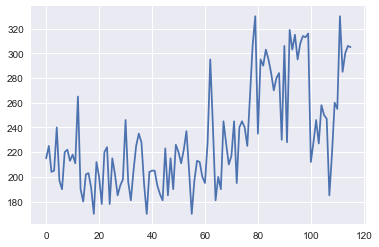

In [67]:
# And look how that would be visualized...You don't have to know the details!
plt.axes().plot(nd_player_weights)

### np.sort
The `np.sort` function returns a sorted copy of an array. Let's go ahead and use that to get a sorted version of our player's weights.

In [68]:
sorted_player_weights = np.sort(nd_player_weights)
print(sorted_player_weights)

[170 170 170 178 178 180 181 181 181 185 185 185 186 190 190 190 190 191
 193 193 194 195 195 196 197 197 198 200 200 200 202 202 203 204 204 205
 205 205 205 205 210 211 211 212 212 212 213 213 215 215 215 217 218 219
 220 220 220 222 222 223 224 225 225 225 226 227 227 228 228 228 228 230
 235 235 237 240 240 240 241 245 245 245 246 246 247 250 255 258 260 265
 265 270 280 284 284 285 290 295 295 295 295 300 303 303 305 306 306 306
 308 313 314 315 316 319 330 330]


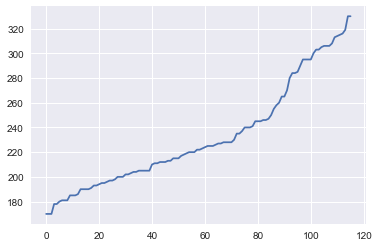

In [69]:
axes = plt.axes()
axes.plot(sorted_player_weights) 

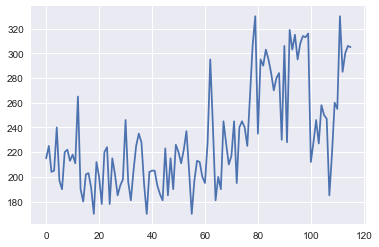

In [70]:
axes = plt.axes()
axes.plot(nd_player_weights) 

<div class="alert alert-block alert-info">
<p>You can also sort an array by calling the `sort` method on the array itself. For example, `nd_player_weights.sort()` would also get you a sorted list.</p>
<p>There is one important difference however. If you call `sort` on the array itself like this, it sorts the array **"in-place"**. This means that the original array elements are rearranged. Using `np.sort` on the other hand returns a new sorted copy of the original array.
</p>
</div> 

In [71]:
nd_player_weights

array([215, 225, 204, 205, 240, 197, 190, 220, 222, 213, 218, 211, 265,
       190, 180, 202, 203, 191, 170, 212, 200, 178, 220, 224, 178, 215,
       202, 185, 193, 198, 246, 196, 181, 205, 225, 235, 228, 194, 170,
       204, 205, 205, 193, 186, 181, 223, 185, 215, 190, 226, 220, 211,
       222, 237, 205, 170, 197, 213, 212, 200, 195, 228, 295, 241, 181,
       200, 190, 245, 227, 210, 217, 245, 195, 240, 245, 240, 225, 265,
       306, 330, 235, 295, 290, 303, 295, 284, 270, 280, 284, 230, 306,
       228, 319, 303, 315, 295, 308, 314, 313, 316, 212, 228, 246, 227,
       258, 250, 247, 185, 219, 260, 255, 330, 285, 300, 306, 305])

In [72]:
nd_player_weights.sort()
print(nd_player_weights)

[170 170 170 178 178 180 181 181 181 185 185 185 186 190 190 190 190 191
 193 193 194 195 195 196 197 197 198 200 200 200 202 202 203 204 204 205
 205 205 205 205 210 211 211 212 212 212 213 213 215 215 215 217 218 219
 220 220 220 222 222 223 224 225 225 225 226 227 227 228 228 228 228 230
 235 235 237 240 240 240 241 245 245 245 246 246 247 250 255 258 260 265
 265 270 280 284 284 285 290 295 295 295 295 300 303 303 305 306 306 306
 308 313 314 315 316 319 330 330]


In [73]:
nd_player_weights

array([170, 170, 170, 178, 178, 180, 181, 181, 181, 185, 185, 185, 186,
       190, 190, 190, 190, 191, 193, 193, 194, 195, 195, 196, 197, 197,
       198, 200, 200, 200, 202, 202, 203, 204, 204, 205, 205, 205, 205,
       205, 210, 211, 211, 212, 212, 212, 213, 213, 215, 215, 215, 217,
       218, 219, 220, 220, 220, 222, 222, 223, 224, 225, 225, 225, 226,
       227, 227, 228, 228, 228, 228, 230, 235, 235, 237, 240, 240, 240,
       241, 245, 245, 245, 246, 246, 247, 250, 255, 258, 260, 265, 265,
       270, 280, 284, 284, 285, 290, 295, 295, 295, 295, 300, 303, 303,
       305, 306, 306, 306, 308, 313, 314, 315, 316, 319, 330, 330])

## Activity: 

Print the weights of five lightest and five heaviest players

In [76]:
# 5 lightest
sorted_player_weights[:5]

array([170, 170, 170, 178, 178])

In [75]:
# 5 heaviest
sorted_player_weights[-5:]

array([315, 316, 319, 330, 330])

### Activity on heights

* Tallest Height
* Shortest Height
* 3 Tallest Heights
* 3 Shortest Heights

In [77]:
nd_player_heights = np.array(pd.read_csv('./data/nd-football-2018-roster.csv')['Height'])
nd_player_heights

array([71, 73, 71, 72, 73, 74, 71, 71, 74, 73, 73, 75, 76, 73, 69, 70, 72,
       72, 70, 71, 72, 70, 76, 74, 73, 73, 72, 73, 72, 70, 74, 71, 69, 72,
       74, 74, 75, 72, 71, 72, 74, 72, 71, 73, 69, 75, 72, 73, 75, 76, 77,
       71, 75, 72, 71, 70, 70, 74, 71, 75, 68, 72, 74, 76, 71, 74, 73, 75,
       71, 74, 72, 74, 73, 77, 75, 74, 75, 76, 74, 74, 74, 76, 76, 77, 75,
       75, 77, 72, 74, 75, 73, 74, 78, 77, 78, 76, 78, 79, 76, 77, 76, 76,
       77, 76, 77, 78, 77, 70, 74, 76, 76, 75, 74, 76, 73, 79])

In [78]:
# tallest
max(nd_player_heights)

79

In [79]:
# shortest
min(nd_player_heights)

68

In [84]:
# sort numbers
sorted_heights = np.sort(nd_player_heights)

In [85]:
# 3 tallest
sorted_heights[-3:]

array([78, 79, 79])

In [86]:
# 3 shortest
sorted_heights[:3]

array([68, 69, 69])

## Array Merging
Now that we've discussed how to split arrays apart, let's explore how we can piece multiple arrays together with the `np.concatenate`, `np.hstack`, and `np.vstack` functions.

### `np.concatenate`


For some reason, the weight information for the football team has been send to you in two different emails. Now, you've got 2 separate arrays that you need to put together in order to generate the correct statistics for the team.

In [87]:
# Here are your two arrays
# One has 25 data points and the other has the remaining 91
nd_player_weights_1 = nd_player_weights[:25]
nd_player_weights_2 = nd_player_weights[25:]
print(len(nd_player_weights_1), len(nd_player_weights_2))

25 91


In [88]:
# It is super easy to concatenate them together with `np.concatenate`
merged_array = np.concatenate([nd_player_weights_1, nd_player_weights_2])
print(len(merged_array))

116


## Array Reshaping

If you recall, every array has a `shape` attribute which conveys the dimensions of the array.

In [89]:
# Reshape our 116 records into 29 rows with 4 columns
nd_player_weights_grid = nd_player_weights.reshape(29, 4)
nd_player_weights_grid

array([[170, 170, 170, 178],
       [178, 180, 181, 181],
       [181, 185, 185, 185],
       [186, 190, 190, 190],
       [190, 191, 193, 193],
       [194, 195, 195, 196],
       [197, 197, 198, 200],
       [200, 200, 202, 202],
       [203, 204, 204, 205],
       [205, 205, 205, 205],
       [210, 211, 211, 212],
       [212, 212, 213, 213],
       [215, 215, 215, 217],
       [218, 219, 220, 220],
       [220, 222, 222, 223],
       [224, 225, 225, 225],
       [226, 227, 227, 228],
       [228, 228, 228, 230],
       [235, 235, 237, 240],
       [240, 240, 241, 245],
       [245, 245, 246, 246],
       [247, 250, 255, 258],
       [260, 265, 265, 270],
       [280, 284, 284, 285],
       [290, 295, 295, 295],
       [295, 300, 303, 303],
       [305, 306, 306, 306],
       [308, 313, 314, 315],
       [316, 319, 330, 330]])

In [90]:
# Or into a single row of 116 elements
nd_player_weights_grid.reshape(116)

array([170, 170, 170, 178, 178, 180, 181, 181, 181, 185, 185, 185, 186,
       190, 190, 190, 190, 191, 193, 193, 194, 195, 195, 196, 197, 197,
       198, 200, 200, 200, 202, 202, 203, 204, 204, 205, 205, 205, 205,
       205, 210, 211, 211, 212, 212, 212, 213, 213, 215, 215, 215, 217,
       218, 219, 220, 220, 220, 222, 222, 223, 224, 225, 225, 225, 226,
       227, 227, 228, 228, 228, 228, 230, 235, 235, 237, 240, 240, 240,
       241, 245, 245, 245, 246, 246, 247, 250, 255, 258, 260, 265, 265,
       270, 280, 284, 284, 285, 290, 295, 295, 295, 295, 300, 303, 303,
       305, 306, 306, 306, 308, 313, 314, 315, 316, 319, 330, 330])

## Array Splitting

Now let's turn our attention to how we can split arrays into smaller chuncks using the `np.split`, `np.array_split`, `np.hsplit`, and `np.vsplit` functions.

### `np.split`

In [ ]:
# You can split a single dimensional array with `np.split` 
# by specifying the index values on which to split the array.

# Here we will use it to split the array into 5 arrays. 
np.split(nd_player_weights, indices_or_sections=[10, 30, 60, 70, 80])

<div class="alert alert-block alert-info">
<p>It is important to note that the index values you provide will become the first element of the new arrays rather than the last element of the previous split.</p> 
<p>So, in this case, the elements at indexes 10, 30, 60, 70, 80 become the first elements of the new arrays.</p>
</div> 

### `np.array_split`

In [ ]:
# If you want to split an array into equal parts 
# (or a close to equal as possible), use `np.array_split`

# Here we will divided our team into 6 parts.
np.array_split(nd_player_weights, 6)

### MORE INFORMATION: Slicing with Multi-Dimentional Arrays

In [ ]:
two_dim_array = np.random.randint(10, size=(5, 3))  
two_dim_array

In [ ]:
# Slice the first 4 rows and 1st column of each row
two_dim_array[:4, :1]

In [ ]:
# Slice the first 4 rows and then select the last one
print(two_dim_array[:4][-1])
print(two_dim_array[3])


In [ ]:
# Slice the first 4 rows and collect the last element
two_dim_array[:4,-1]

<div class="alert alert-block alert-danger">
<h5>Warning</h5>
<p>When we were selecting individual elements of arrays, we demonstrated that there were two ways of getting to a specific element of a multi-dimensional array.
</p>
<ul>
    <li><code>two_dim_array[1, 1]</code></li>
    <li><code>two_dim_array[1][1]</code></li>
</ul>

You can <strong>not</strong> use the second form when slicing an array.
<code>two_dim_array[:4, :1]</code> will give very different results than <code>two_dim_array[:4][:1]</code>

</div> 